# Análisis Exploratorio y Análisis de Datos de Terremotos en Chile

## 1. Introducción

-  **Descripción del dataset**: 
    Breve descripción de las variables Profoundity, Magnitude, Latitude, y Longitude.
    - Los datos utilizados para crear este conjunto de datos fueron tomados de la base de datos del Centro Sismológico Nacional, que contiene datos sobre terremotos significativos (perceptibles) en Chile.

    - Chile es un país famoso por su alta actividad sísmica. De hecho, es uno de los lugares más sísmicos del mundo, lo que lo convierte en un lugar de interés para muchos investigadores que investigan este tema.

    - Este conjunto de datos contiene un único archivo llamado terremotos.csv, que se compone de las siguientes columnas:

    - Fecha (UTC): Marca de tiempo en la que se registró el terremoto (precisión de hasta 1 segundo).
    - Latitud/Longitud: La ubicación del terremoto.
    - Profundidad: La profundidad (medida en km) del terremoto.
    - Magnitud: La magnitud del terremoto.
    Estos datos cubren terremotos con magnitudes que van de 3 a 9, y que ocurrieron entre el 01-01-2012 y 2024.  Todos los terremotos del conjunto de datos tienen una profundidad máxima de 300 km.

    ### Conjunto de datos creado por **Nicolás Ariel González Muñoz** y descargado desde **Kaggle** https://www.kaggle.com/datasets/nicolasgonzalezmunoz/earthquakes-on-chile



-  **Objetivo del análisis**: 
    - El objetivo de este análisis es explorar y analizar los datos de terremotos ocurridos en Chile desde el año 2000 hasta el 2024 para identificar patrones y relaciones entre la magnitud, profundidad y ubicación geográfica de los sismos. A través de una serie de visualizaciones y análisis estadísticos, se busca obtener una comprensión más profunda de cómo estas variables interactúan entre sí, y si es posible identificar tendencias o áreas geográficas con mayor actividad sísmica. Este análisis también evaluará la posibilidad de aplicar técnicas de machine learning para predecir la magnitud o la severidad de futuros terremotos basados en los datos disponibles.

## 2. Cargar y Explorar los Datos

-  **Descripción de las variables**:

- Profoundity: Profundidad del terremoto.

- Magnitude: Magnitud del terremoto.

- Latitude: Latitud donde ocurrió el terremoto.

- Longitude: Longitud donde ocurrió el terremoto.

-  **Distribución de las variables**:

- Visualizar la distribución de cada variable utilizando histogramas o gráficos de densidad.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import csv

In [57]:
# Cargar el dataset
file_path = 'terremotos.csv'
df = pd.read_csv(file_path)

In [58]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2  2024-03-01 08:27:13       26 km    2.9 Ml  2024-03-01  05:27:13   
3  2024-03-01 08:22:21       54 km    3.7 Ml  2024-03-01  05:22:21   
4  2024-03-01 07:12:58       20 km    2.9 Ml  2024-03-01  04:12:58   

                   Location  Latitude  Longitude  
0    45 km al SE de Socaire   -23.958    -67.698  
1     57 km al E de Socaire   -23.800    -67.375  
2      33 km al S de Huasco   -28.755    -71.288  
3     49 km al SO de Huasco   -28.822    -71.520  
4  16 km al SE de Los Vilos   -31.991    -71.376  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UTC Date     13406

In [59]:
df.tail()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
134057,2000-01-03 02:41:41,42 km,3.6 Mc,2000-01-02,23:41:41,15 km al SO de Quillota,-32.986,-71.348
134058,2000-01-02 19:36:25,95 km,2.7 Mc,2000-01-02,16:36:25,22 km al S de Petorca,-32.446,-70.923
134059,2000-01-02 18:55:55,36 km,3.8 Mc,2000-01-02,15:55:55,18 km al NO de Illapel,-31.535,-71.318
134060,2000-01-02 05:03:13,46 km,3.7 Mc,2000-01-02,02:03:13,16 km al SO de Melipilla,-33.787,-71.339
134061,2000-01-02 03:42:12,82 km,2.5 Mc,2000-01-02,00:42:12,22 km al O de Santiago,-33.410,-70.880


In [60]:
df.head()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
0,2024-03-01 16:35:22,243 km,2.9 Ml,2024-03-01,13:35:22,45 km al SE de Socaire,-23.958,-67.698
1,2024-03-01 15:41:03,259 km,3.6 Ml,2024-03-01,12:41:03,57 km al E de Socaire,-23.800,-67.375
2,2024-03-01 08:27:13,26 km,2.9 Ml,2024-03-01,05:27:13,33 km al S de Huasco,-28.755,-71.288
3,2024-03-01 08:22:21,54 km,3.7 Ml,2024-03-01,05:22:21,49 km al SO de Huasco,-28.822,-71.520
4,2024-03-01 07:12:58,20 km,2.9 Ml,2024-03-01,04:12:58,16 km al SE de Los Vilos,-31.991,-71.376


In [61]:
df.describe()

,Latitude,Longitude
count,133590.000000,133590.000000
mean,-28.025143,-69.920180
std,6.730286,10.663553
min,-65.399000,-179.989000
25%,-33.048000,-71.698000
50%,-29.742000,-70.527000
75%,-21.997000,-69.013000
max,58.692000,179.647000


Como podemos ver atraves de este analisis nos damos cuenta, solo obtenemos la descripcion de los datos en este caso solo podemos visualizar la Latitud y Longitud que estan presentes en el dataset, por ende lo que vamos a realizar el procesamiento de los datos para obtener la profundidad y la maginitud de los terremotos para asi tener un analisis mas amplio de nuestro dataset, tambien tenemos datos nulos los cualeales revisando son aquellos que ocurren certa de la estacion Frei en la Antartica las cuales estan entre comillas y el dataset lo considera como datos nulos, por ende vamos a realizar una transformacion sobre estos datos para darle valor y asi aumentar los regstros presentes en el dataset

In [62]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


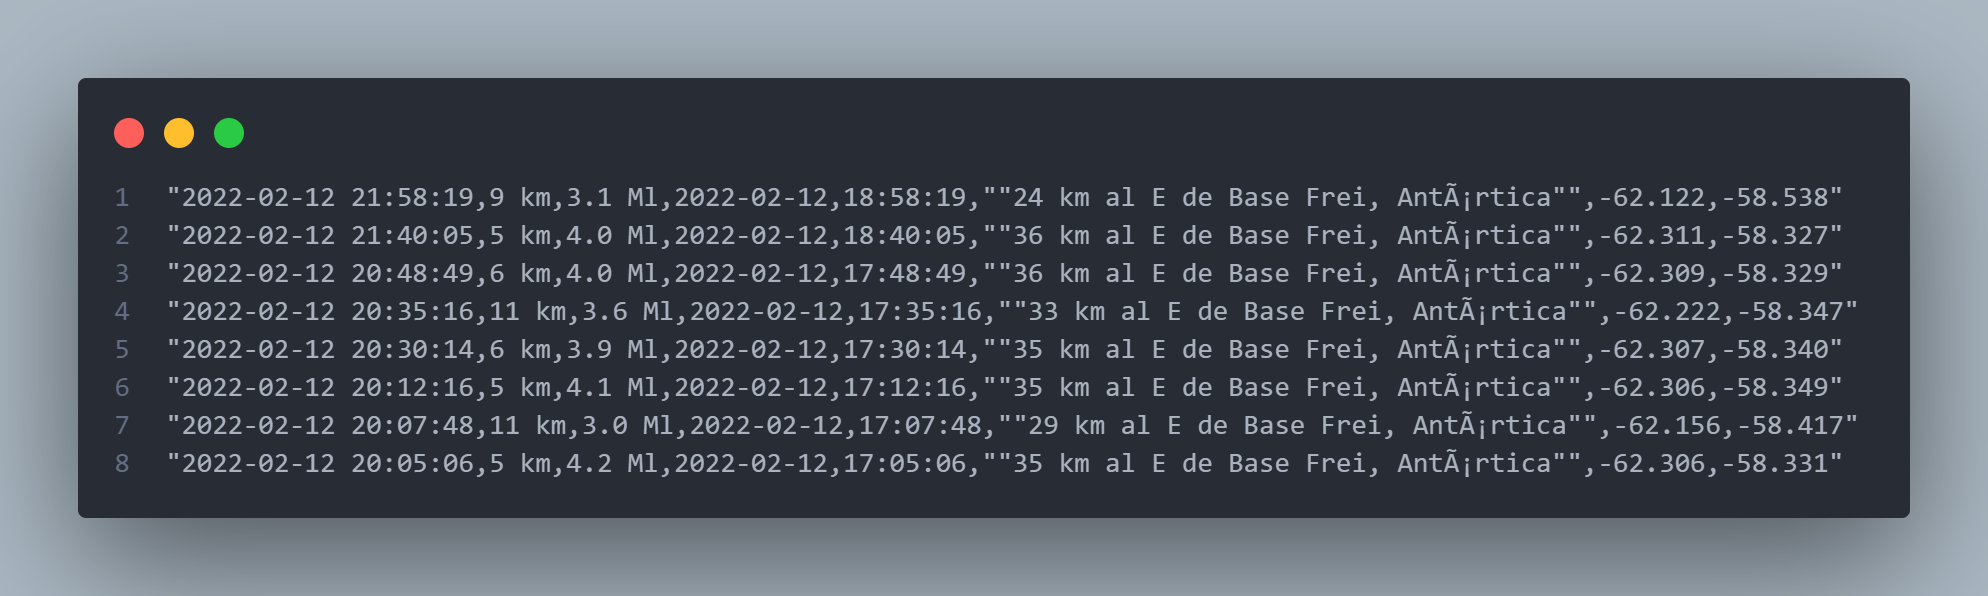

In [63]:
from IPython.display import Image, display
display(Image(filename='code.png'))

no muestra los datos posibles en el describe lo que vamos hacer ahora es dla preparacion de los datos para el analisis posterior de las demas variables, ya que se encuentran en cadenas de texto por lo cual no se puede aplicar estadisca bassica para estos valores

Exploracion basica de los datos, para saber si ahay nulos, el tipo de dato, que datos hay, los primeros valores presentes en el dataset en bruto

In [64]:
# Leer el contenido del archivo y eliminar las comillas dobles
with open('terremotos.csv', "r+", encoding="utf-8") as csv_file:
    content = csv_file.read()

with open('edited.csv', "w+", encoding="utf-8") as csv_file:
    # Reemplazar comillas dobles
    content = content.replace('"', '')
    
    # Escribir el contenido sin las comillas dobles en el nuevo archivo
    csv_file.write(content)

# Ahora, agregar la columna "Errors"
with open('edited.csv', "r", encoding="utf-8") as csv_file:
    reader = csv.reader(csv_file)
    rows = list(reader)

# Agregar la columna "Errors" en el encabezado
header = rows[0] + ['Errors']
rows[0] = header

# Guardar el archivo con la nueva columna
with open('edited.csv', "w", encoding="utf-8", newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

dataset generado sin las comillas presentes en el dataset

In [65]:
# Cargar el dataset
file_path = 'edited.csv'
df = pd.read_csv(file_path)

C:\Users\lea\AppData\Local\Temp\ipykernel_8440\293882957.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset limpio de comillas, falta ajustar las columnas correspondientes, ya que el valdor AntÃ¡rtica no se encuentra en la columna correspondiente, por ende vamos a editar el dataset en excel ya que no se logoro realizar esta sustitucion mediante codigo python 

In [66]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2  2024-03-01 08:27:13       26 km    2.9 Ml  2024-03-01  05:27:13   
3  2024-03-01 08:22:21       54 km    3.7 Ml  2024-03-01  05:22:21   
4  2024-03-01 07:12:58       20 km    2.9 Ml  2024-03-01  04:12:58   

                   Location Latitude  Longitude  Errors  
0    45 km al SE de Socaire  -23.958    -67.698     NaN  
1     57 km al E de Socaire  -23.800    -67.375     NaN  
2      33 km al S de Huasco  -28.755    -71.288     NaN  
3     49 km al SO de Huasco  -28.822    -71.520     NaN  
4  16 km al SE de Los Vilos  -31.991    -71.376     NaN  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------

ULTIMAS TRANSFORMACIONES

In [67]:
# Cargar el dataset
file_path = 'df_final.csv'
df = pd.read_csv(file_path)

In [68]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2   2024-03-01 8:27:13       26 km    2.9 Ml  2024-03-01   5:27:13   
3   2024-03-01 8:22:21       54 km    3.7 Ml  2024-03-01   5:22:21   
4   2024-03-01 7:12:58       20 km    2.9 Ml  2024-03-01   4:12:58   

                   Location  Latitude  Longitude  
0    45 km al SE de Socaire   -23.958    -67.698  
1     57 km al E de Socaire   -23.800    -67.375  
2      33 km al S de Huasco   -28.755    -71.288  
3     49 km al SO de Huasco   -28.822    -71.520  
4  16 km al SE de Los Vilos   -31.991    -71.376  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UTC Date     13406

In [69]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)

La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


In [70]:
# Identificar valores únicos en la columna 'Magnitude' que no se pueden convertir a float
unusual_values = df['Magnitude'].str.extract(r'([^\d\.\s]+)')

# Mostrar los valores únicos inusuales encontrados
print(unusual_values[0].dropna().unique())


['Ml' 'Mw' 'Mww' 'Mb' 'Mlv' 'M' 'Ms' 'Mc']


In [71]:
# Identificar valores únicos en la columna 'Magnitude' que no se pueden convertir a float
unusual_values_Profoundity = df['Profoundity'].str.extract(r'([^\d\.\s]+)')

# Mostrar los valores únicos inusuales encontrados
print(unusual_values_Profoundity[0].dropna().unique())

['km']


In [72]:
# Eliminar las letras (escala) y convertir a float Variables Magnitude y Profoundity
df['Magnitude'] = df['Magnitude'].str.extract(r'([\d\.]+)').astype(float)
df['Profoundity'] = df['Profoundity'].str.extract(r'([\d\.]+)').astype(float)

# Verificar que la conversión de los datos esta bien
print(df[['Magnitude']].head())
print(df[['Profoundity']].head())


   Magnitude
0        2.9
1        3.6
2        2.9
3        3.7
4        2.9
   Profoundity
0        243.0
1        259.0
2         26.0
3         54.0
4         20.0


FINAL DEL PROCESAMIENTO EY TRATAMIENTO DE LOS DATOS

## 3. Análisis Univariado

-  **Profundidad (Profoundity)**:
- Crear histogramas y gráficos de densidad para visualizar la distribución.

- Identificar valores atípicos (outliers) y describir su impacto.


Análisis Univariado de la Variable 'Profoundity'
Media: 76.96
Mediana: 56.00
Desviación Estándar: 61.18
Valor Mínimo: 0.00
Valor Máximo: 676.00


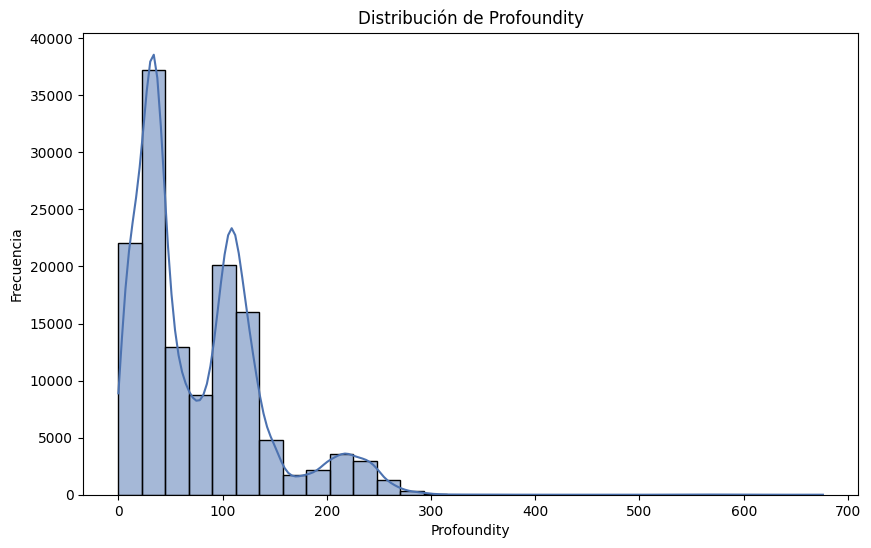

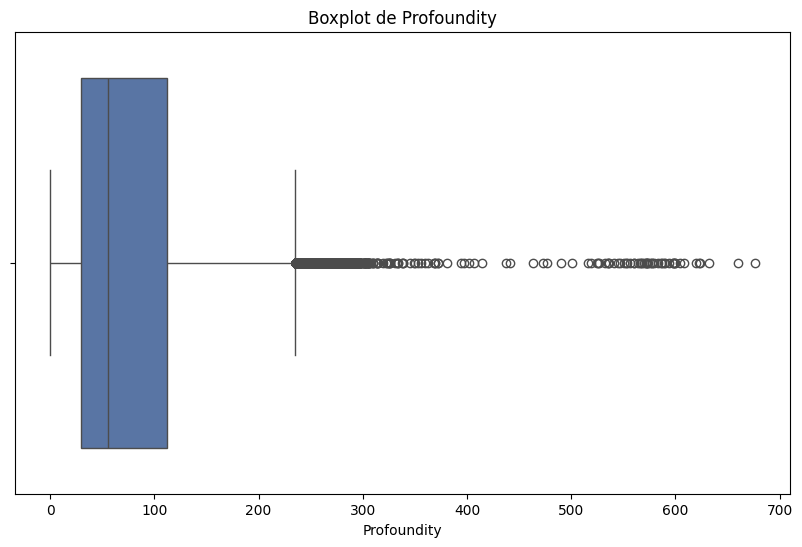

Número de outliers en 'Profoundity': 3289


In [82]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['Profoundity'])
profundity_median = np.median(df['Profoundity'])
profundity_std = np.std(df['Profoundity'])
profundity_min = np.min(df['Profoundity'])
profundity_max = np.max(df['Profoundity'])

print("Análisis Univariado de la Variable 'Profoundity'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Profoundity'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Profoundity')
plt.xlabel('Profoundity')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profoundity'], color='#4C72B0')
plt.title('Boxplot de Profoundity')
plt.xlabel('Profoundity')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['Profoundity'], 25)
Q3 = np.percentile(df['Profoundity'], 75)
IQR = Q3 - Q1

outliers = df[(df['Profoundity'] < (Q1 - 1.5 * IQR)) | (df['Profoundity'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'Profoundity': {len(outliers)}")

-  **Magnitud (Magnitude)**:

- Generar un histograma con binning adecuado para resaltar patrones.

- Crear un gráfico de caja (boxplot) para identificar outliers.

Análisis Univariado de la Variable 'Magnitude'
Media: 3.25
Mediana: 3.10
Desviación Estándar: 1.00
Valor Mínimo: 1.00
Valor Máximo: 8.80


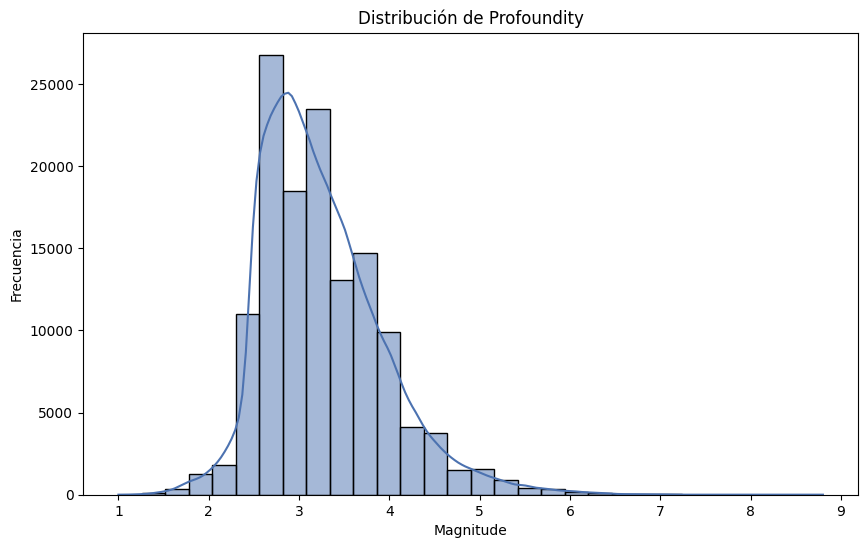

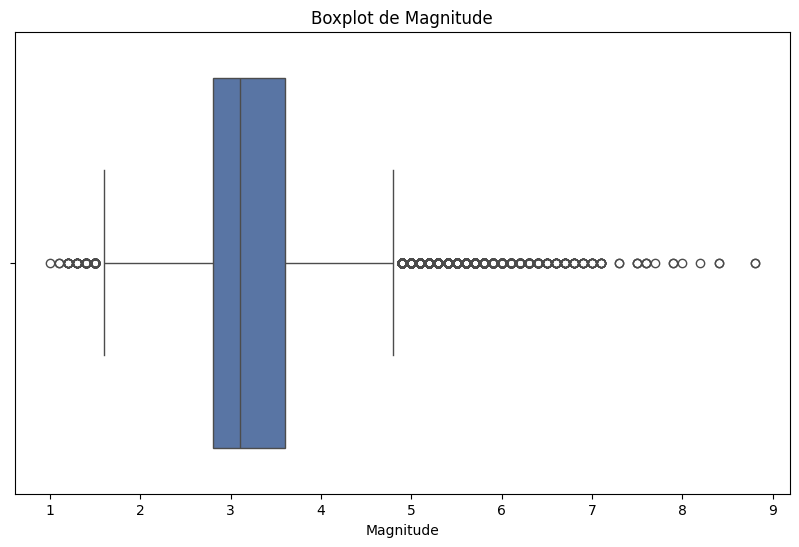

Número de outliers en 'Magnitude': 3732


In [84]:
# Descripción estadística básica de la variable 'Profoundity'
magnitude_mean = np.mean(df['Magnitude'])
magnitude_median = np.median(df['Magnitude'])
magnitude_std = np.std(df['Magnitude'])
magnitude_min = np.min(df['Magnitude'])
magnitude_max = np.max(df['Magnitude'])

print("Análisis Univariado de la Variable 'Magnitude'")
print(f"Media: {magnitude_mean:.2f}")
print(f"Mediana: {magnitude_median:.2f}")
print(f"Desviación Estándar: {magnitude_min:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {magnitude_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Profoundity')
plt.xlabel('Magnitude')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Magnitude'], color='#4C72B0')
plt.title('Boxplot de Magnitude')
plt.xlabel('Magnitude')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['Magnitude'], 25)
Q3 = np.percentile(df['Magnitude'], 75)
IQR = Q3 - Q1

outliers = df[(df['Magnitude'] < (Q1 - 1.5 * IQR)) | (df['Magnitude'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'Magnitude': {len(outliers)}")

-  **Latitud y Longitud**:

- Crear gráficos de dispersión (scatter plots) para observar la distribución geográfica de los terremotos.

In [85]:
# Medidas de tendencia central y dispersión para Latitude
media_latitude = np.mean(df['Latitude'])
mediana_latitude = np.median(df['Latitude'])
std_latitude = np.std(df['Latitude'])
min_latitude = np.min(df['Latitude'])
max_latitude = np.max(df['Latitude'])

print(f"Tendencia central de Latitudes")
print(f"Media de Latitud: {media_latitude:.2f}")
print(f"Mediana de Latitud: {mediana_latitude:.2f}")
print(f"Desviación Estándar de Latitud: {std_latitude:.2f}")
print(f"Mínimo de Latitud: {min_latitude:.2f}")
print(f"Máximo de Latitud: {max_latitude:.2f}")

# Medidas de tendencia central y dispersión para Longitude
media_longitude = np.mean(df['Longitude'])
mediana_longitude = np.median(df['Longitude'])
std_longitude = np.std(df['Longitude'])
min_longitude = np.min(df['Longitude'])
max_longitude = np.max(df['Longitude'])

print(f"\nTendencia central de Longitudes")
print(f"Media de Longitud: {media_longitude:.2f}")
print(f"Mediana de Longitud: {mediana_longitude:.2f}")
print(f"Desviación Estándar de Longitud: {std_longitude:.2f}")
print(f"Mínimo de Longitud: {min_longitude:.2f}")
print(f"Máximo de Longitud: {max_longitude:.2f}")


Tendencia central de Latitudes
Media de Latitud: -28.14
Mediana de Latitud: -29.80
Desviación Estándar de Latitud: 7.01
Mínimo de Latitud: -65.40
Máximo de Latitud: 58.69

Tendencia central de Longitudes
Media de Longitud: -69.87
Mediana de Longitud: -70.52
Desviación Estándar de Longitud: 10.70
Mínimo de Longitud: -179.99
Máximo de Longitud: 179.65


### Latitud
- **Media (-28.14):** La latitud promedio de los sismos se sitúa alrededor de -28.14 grados. Esto indica que la mayoría de los sismos en el dataset ocurren en el hemisferio sur, cerca del trópico de Capricornio.
- **Mediana (-29.80):** La mediana, que es ligeramente más baja que la media, sugiere que la mitad de los sismos tienen lugar al sur de -29.80 grados de latitud, reforzando la idea de que los sismos están concentrados más hacia el sur.
- **Desviación Estándar (7.01):** La desviación estándar de 7.01 grados sugiere que hay una dispersión moderada en las latitudes donde ocurren los sismos. Los sismos no están concentrados en un solo punto, sino que están distribuidos a lo largo de varios grados de latitud.
- **Mínimo (-65.40):** El valor mínimo de latitud (-65.40) indica que algunos sismos ocurren en latitudes muy al sur, posiblemente cerca de la región antártica.
- **Máximo (58.69):** El valor máximo de latitud (58.69) muestra que algunos sismos ocurren en latitudes muy al norte, aunque este valor es excepcional, ya que la media y la mediana sugieren que la mayoría de los sismos están más al sur.

### Longitud
- **Media (-69.87):** La longitud promedio de los sismos es de aproximadamente -69.87 grados. Esto indica que los sismos están centrados geográficamente en la longitud cercana a la costa chilena, en la región oeste de América del Sur.
- **Mediana (-70.52):** La mediana de longitud es ligeramente más baja que la media, sugiriendo una concentración de sismos un poco más hacia el oeste.
- **Desviación Estándar (10.70):** La desviación estándar de 10.70 grados en la longitud indica una dispersión mayor en comparación con la latitud. Esto significa que los sismos están distribuidos a lo largo de una gama más amplia de longitudes.
- **Mínimo (-179.99):** El valor mínimo de longitud (-179.99) sugiere que algunos sismos ocurren muy cerca de la línea internacional de cambio de fecha, al oeste del continente americano.
- **Máximo (179.65):** El valor máximo de longitud (179.65) indica que algunos sismos ocurren al este de la línea internacional de cambio de fecha, lo que podría incluir eventos cercanos a Asia o las islas del Pacífico.


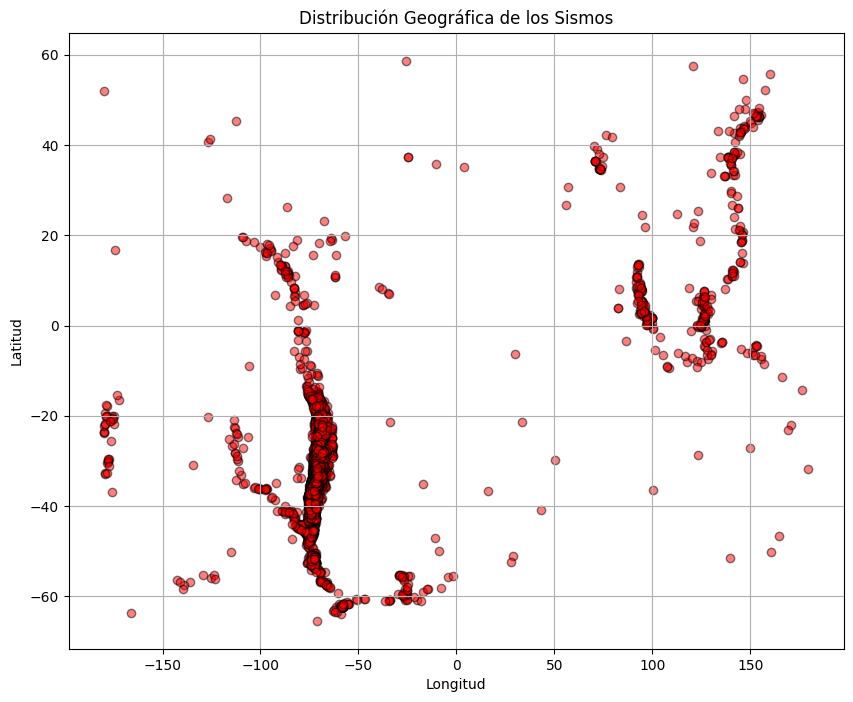

In [86]:
# Gráfico de dispersión de Latitud y Longitud
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='red', edgecolor='k')
plt.title('Distribución Geográfica de los Sismos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


## 4. Análisis Bivariado

-  **Relación entre Profundidad y Magnitud**:

- Utilizar un gráfico de dispersión para analizar la relación entre profundidad y magnitud.

- Calcular la correlación para cuantificar la relación.


-  **Relación entre Latitud/Longitud y Magnitud**:

- Crear un mapa de calor (heatmap) o gráficos geoespaciales para visualizar la intensidad de los terremotos en diferentes ubicaciones.

-  **Relación entre Profundidad y Latitud/Longitud**:

- Crear gráficos de dispersión por región para identificar patrones geoespaciales.

In [73]:
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
UTC Date       0
Profoundity    0
Magnitude      0
Date           0
Hour           0
Location       0
Latitude       0
Longitude      0
dtype: int64


In [74]:

#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
df.dtypes

Columna y tipo de dato
----------------------


UTC Date        object
Profoundity    float64
Magnitude      float64
Date            object
Hour            object
Location        object
Latitude       float64
Longitude      float64
dtype: object

In [75]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)

La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


In [76]:
df.describe()

,Profoundity,Magnitude,Latitude,Longitude
count,134062.000000,134062.000000,134062.000000,134062.000000
mean,76.958653,3.252443,-28.144294,-69.867985
std,61.181450,0.679481,7.011530,10.697731
min,0.000000,1.000000,-65.399000,-179.989000
25%,30.000000,2.800000,-33.075000,-71.695000
50%,56.000000,3.100000,-29.800500,-70.518000
75%,112.000000,3.600000,-22.008000,-69.002000
max,676.000000,8.800000,58.692000,179.647000


In [77]:
# Verificar que la columna ha sido eliminada
df.head()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
0,2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,45 km al SE de Socaire,-23.958,-67.698
1,2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,57 km al E de Socaire,-23.800,-67.375
2,2024-03-01 8:27:13,26.0,2.9,2024-03-01,5:27:13,33 km al S de Huasco,-28.755,-71.288
3,2024-03-01 8:22:21,54.0,3.7,2024-03-01,5:22:21,49 km al SO de Huasco,-28.822,-71.520
4,2024-03-01 7:12:58,20.0,2.9,2024-03-01,4:12:58,16 km al SE de Los Vilos,-31.991,-71.376


In [78]:
#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
df.dtypes

Columna y tipo de dato
----------------------


UTC Date        object
Profoundity    float64
Magnitude      float64
Date            object
Hour            object
Location        object
Latitude       float64
Longitude      float64
dtype: object

In [79]:
print("Tendencia central de Magnitudes")
print("{0:<25}: {1:.2f}".format("Media de Magnitudes", np.mean(df['Magnitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Magnitudes", np.median(df['Magnitude'])))

print("\nTendencia central de Profundidades")
print("{0:<25}: {1:.2f}".format("Media de Profundidad", np.mean(df['Profoundity'])))
print("{0:<25}: {1:.2f}".format("Mediana de Profundidad", np.median(df['Profoundity'])))

print("\nTendencia central de Latitudes")
print("{0:<25}: {1:.2f}".format("Media de Latitud", np.mean(df['Latitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Latitud", np.median(df['Latitude'])))

print("\nTendencia central de Longitudes")
print("{0:<25}: {1:.2f}".format("Media de Longitud", np.mean(df['Longitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Longitud", np.median(df['Longitude'])))


Tendencia central de Magnitudes
Media de Magnitudes      : 3.25
Mediana de Magnitudes    : 3.10

Tendencia central de Profundidades
Media de Profundidad     : 76.96
Mediana de Profundidad   : 56.00

Tendencia central de Latitudes
Media de Latitud         : -28.14
Mediana de Latitud       : -29.80

Tendencia central de Longitudes
Media de Longitud        : -69.87
Mediana de Longitud      : -70.52


In [80]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filtrar los datos para sismos con magnitud > 8.0 entre 2010 y 2024
df_filtered = df[(df['Magnitude'] > 8.0) & (df['Date'].dt.year >= 2010) & (df['Date'].dt.year <= 2024)]

# Crear un mapa centrado en Chile (latitud y longitud aproximadas)
m = folium.Map(location=[-33.45, -70.65], zoom_start=5)  # Santiago de Chile como referencia

# Agregar los puntos filtrados del dataset al mapa
for index, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,  
        popup=f"Magnitude: {row['Magnitude']}, Location: {row['Location']}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)
m


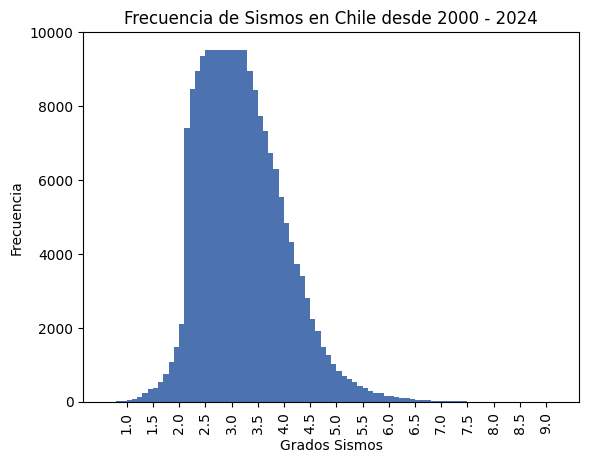

In [81]:

frecuenciaMinTemp = df['Magnitude'].value_counts().sort_index()

# Crear un gráfico de barras
plt.bar(frecuenciaMinTemp.index, frecuenciaMinTemp.values, color='#4C72B0')

# Agregar etiquetas al gráfico
plt.title('Frecuencia de Sismos en Chile desde 2000 - 2024')
plt.xlabel('Grados Sismos')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x para mostrar incrementos de 0.5
plt.xticks(np.arange(frecuenciaMinTemp.index.min(), frecuenciaMinTemp.index.max() + 0.5, 0.5), rotation=90)

# Mostrar el gráfico
plt.show()


## 5. Análisis de Patrones y Tendencias

-  **Análisis de clusters**:

- Implementar técnicas de clustering (K-Means) para identificar posibles clusters de terremotos en función de la localización geográfica y magnitud.


-  **Tendencias temporales**:

- Si se incluye la fecha, analizar patrones a lo largo del tiempo para identificar tendencias.

## 6. Conclusiones

-  **Resumen de hallazgos clave**: Resumir los principales hallazgos del análisis.

-  **Posibles interpretaciones**: Proveer interpretaciones de los patrones observados.

-  **Sugerencias para análisis futuros**: Proponer ideas para análisis futuros o cómo aplicar estos hallazgos en otros contextos.

## 7. Posibilidades de Machine Learning

-  **Predicción de la Magnitud**:

- Implementar un modelo de regresión para predecir la magnitud en función de la profundidad y la localización.

-  **Clasificación de la Severidad**:

- Crear un modelo de clasificación para predecir si un terremoto será leve o severo.

-  **Clusterización Geoespacial**:

- Usar técnicas de clustering como K-Means o DBSCAN para identificar áreas geográficas con alta incidencia de terremotos.# Análisis Exploratorio y Análisis de Datos de Terremotos en Chile